In [2]:
# # Install modul-modul yang diperlukan dalam tugas ini, 
# yaitu numpy, OpenCV, scikit-learn, dan matplotlib

#!pip install numpy opencv-python matplotlib scikit-learn
%pip install numpy opencv-python matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Mengimpor modul-modul yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Praktikum 1: Ekstraksi Garis dengan Hough Transform

Tujuan: Mempelajari cara mendeteksi garis dari gambar menggunakan Hough Transform.

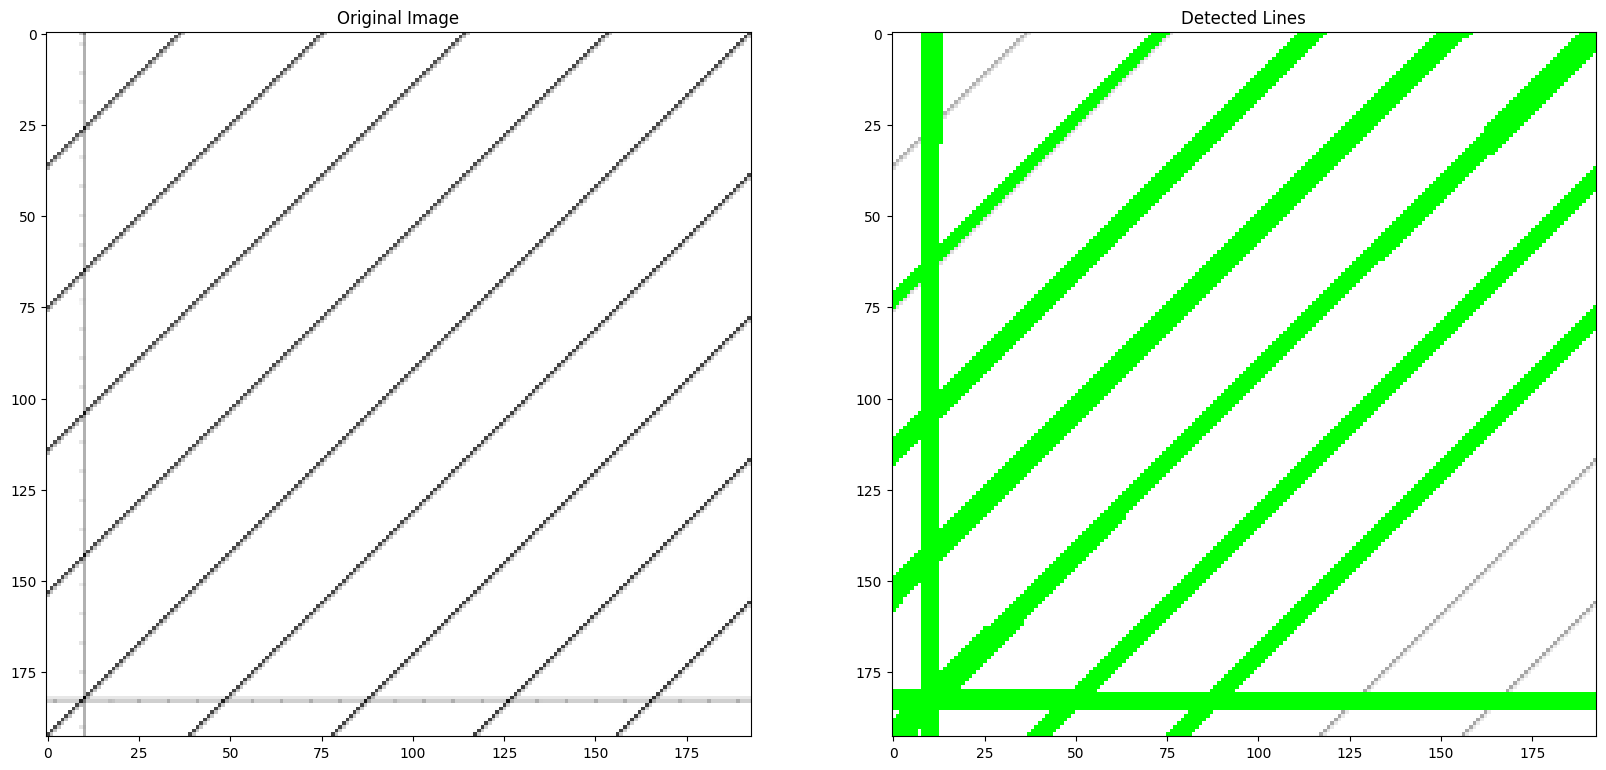

In [4]:
# Memuat gambar
image = cv2.imread("example_image_lines.png", cv2.IMREAD_GRAYSCALE)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(image, 50, 150)

# Deteksi garis menggunakan Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

# Gambar garis hasil deteksi pada gambar asli
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Tampilkan hasil
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Lines")
plt.show()


Hasil Analisis Output:
Hasil output menunjukkan gambar asli di sebelah kiri dengan pola garis-garis diagonal hitam dalam sebuah plot grafik. Di sebelah kanan, hasil deteksi garis menggunakan transformasi Hough ditampilkan, di mana sebagian besar garis pada gambar berhasil diidentifikasi dan digambar ulang dengan warna hijau. Ini membuktikan bahwa algoritma deteksi tepi dan transformasi Hough bekerja dengan baik dalam mengenali garis lurus pada pola yang teratur seperti pada gambar ini.

# Praktikum 2: Template Matching untuk Deteksi Objek

Tujuan: Mengenali objek di dalam gambar menggunakan Template Matching.

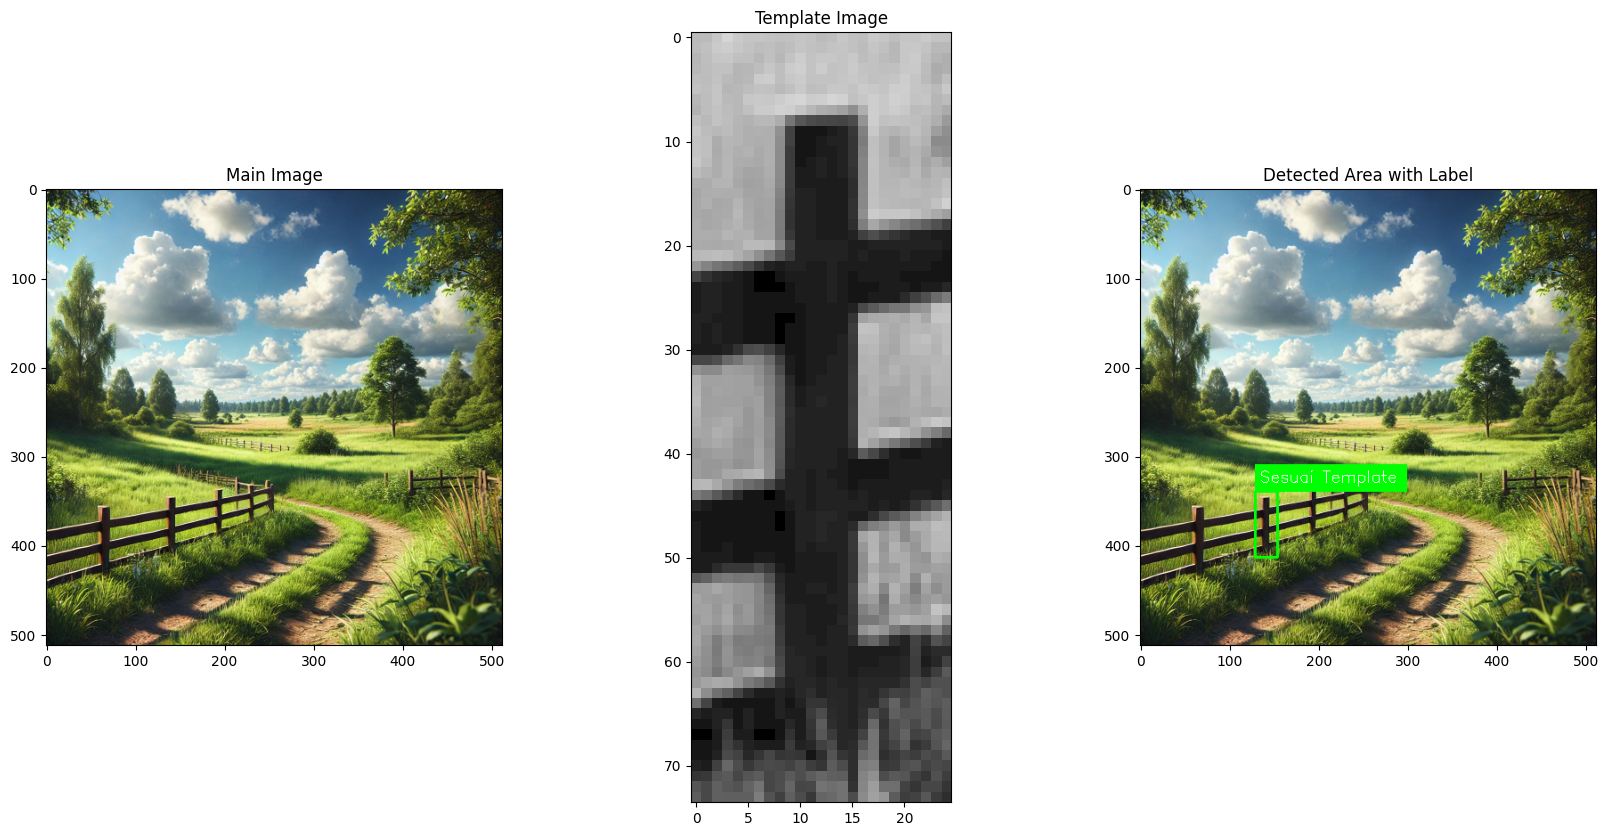

In [5]:
# Fungsi untuk memeriksa apakah template lebih kecil dari gambar utama
def validate_template_size(main_image, template):
    if template.shape[0] > main_image.shape[0] or template.shape[1] > main_image.shape[1]:
        raise ValueError("Template size must be smaller than the main image size!")

#Menggunakan exception karena program rentan error
try:
    # Load gambar utama dan template
    main_image = cv2.imread("example_image.png")  # Gambar asli dimuat berwarna
    template = cv2.imread("example_image_template.png", cv2.IMREAD_GRAYSCALE)  # Template tetap grayscale

    # Validasi ukuran template
    validate_template_size(main_image, template)

    # Konversi gambar utama ke grayscale untuk template matching
    main_image_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

    # Lakukan Template Matching
    result = cv2.matchTemplate(main_image_gray, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Gambar kotak di sekitar area yang terdeteksi
    h, w = template.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Salin gambar untuk output dan tambahkan kotak dan label
    output = main_image.copy()
    cv2.rectangle(output, top_left, bottom_right, (0, 255, 0), 2)  # Kotak hijau
    # Tambahkan kotak label di atas kotak deteksi
    label_top_left = (top_left[0], top_left[1] - 30)
    label_bottom_right = (top_left[0] + 170, top_left[1])
    cv2.rectangle(output, label_top_left, label_bottom_right, (0, 255, 0), -1)  # Kotak hijau solid untuk label
    cv2.putText(output, "Sesuai Template", (top_left[0] + 5, top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)  # Teks putih di atas kotak label

    # Tampilkan hasil
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)), plt.title("Main Image")
    plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB)), plt.title("Template Image")
    plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Area with Label")
    plt.show()

except ValueError as ve:
    print("Error in template validation:", ve)
except Exception as e:
    print("An unexpected error occurred:", e)


Hasil Analisis Output: Hasil output menunjukkan bahwa algoritma Template Matching berhasil mendeteksi objek pada gambar utama. Pada gambar hasil (kanan), area di mana template cocok dengan gambar utama ditandai dengan kotak hijau, dan label ditambahkan di atasnya. Ini membuktikan bahwa metode ini dapat secara akurat menemukan posisi objek dalam gambar dengan mencocokkan pola template dengan area pada gambar utama.

# Praktikum 3: Pembuatan Pyramid Gambar

Tujuan: Memahami cara membuat Gaussian Pyramid untuk memproses gambar pada berbagai skala.

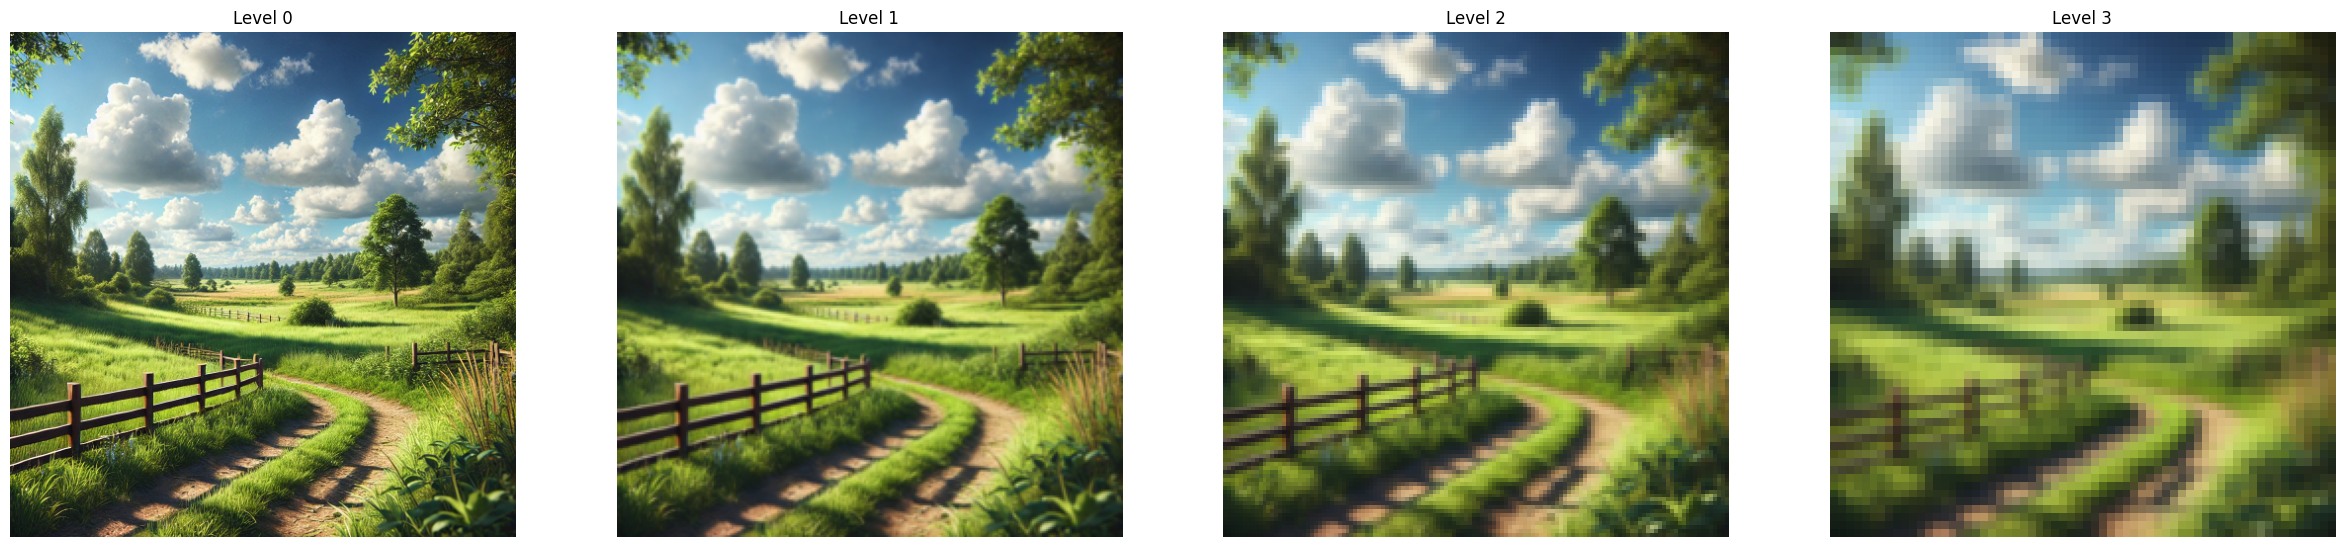

In [6]:
# Load gambar
image = cv2.imread("example_image.png")

# Buat Gaussian Pyramid
pyramid = [image]
for i in range(3):  # Buat 3 level pyramid
    image = cv2.pyrDown(image)
    pyramid.append(image)

# Tampilkan setiap level
plt.figure(figsize=(30, 10))
for level, img in enumerate(pyramid):
    plt.subplot(1, len(pyramid), level + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Level {level}')
    plt.axis('off')

plt.show()

Hasil Analisis Output: Hasil output menunjukkan empat level Gaussian Pyramid dari gambar yang diunggah. Level 0 adalah gambar asli dengan resolusi penuh, sementara Level 1 hingga Level 3 menunjukkan gambar dengan resolusi yang semakin rendah. Setiap level gambar lebih kecil dan detailnya berkurang, menghasilkan representasi sederhana dari gambar asli. Teknik ini berguna untuk analisis multi-skala, seperti dalam deteksi fitur atau pengolahan gambar pada skala yang berbeda.


# Praktikum 4: Deteksi Lingkaran Menggunakan Hough Transform

Tujuan: Memahami cara mendeteksi lingkaran di dalam gambar menggunakan metode Hough Transform.

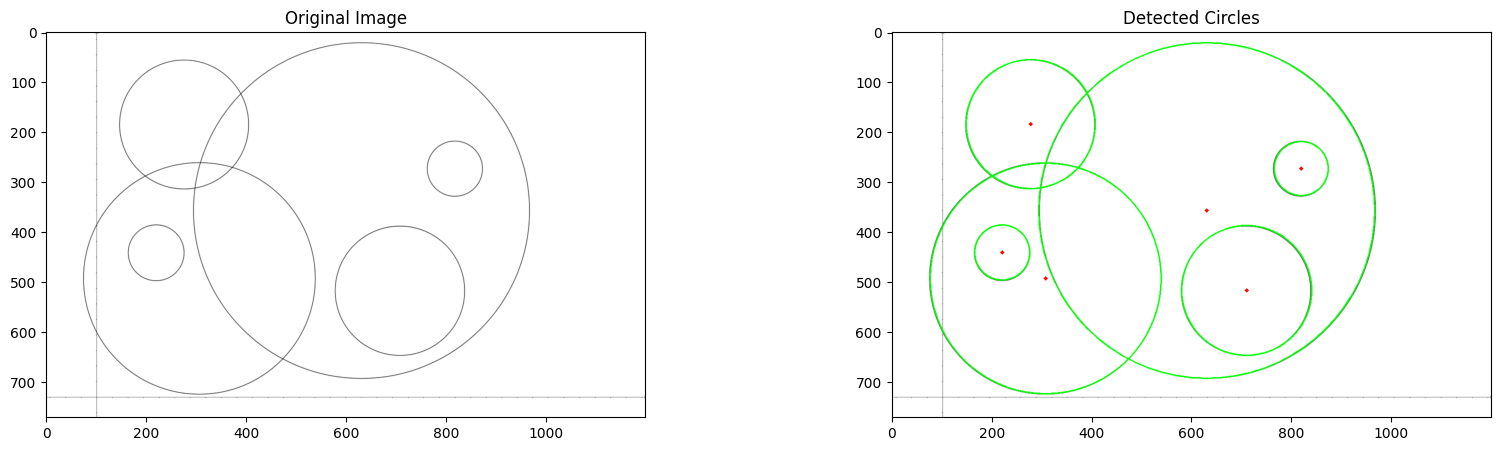

In [7]:
# Load gambar
image = cv2.imread("example_image_circles.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi lingkaran menggunakan Hough Transform
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=80,  # Pastikan jarak antar lingkaran lebih besar
    param1=100,  # Threshold untuk Canny edge detection
    param2=150,   # Sensitivitas deteksi (naikkan jika terlalu banyak deteksi)
    minRadius=30,  # Ukuran radius minimal bola
    maxRadius=450  # Ukuran radius maksimal bola
)

# Gambar lingkaran yang terdeteksi pada gambar asli
output = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # Koordinat pusat lingkaran
        radius = circle[2]  # Radius lingkaran
        cv2.circle(output, center, radius, (0, 255, 0), 2)  # Gambar lingkaran
        cv2.circle(output, center, 2, (0, 0, 255), 3)  # Gambar pusat lingkaran

# Tampilkan hasil
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Circles")
plt.show()

Hasil Analisis Output:
Hasil output menunjukkan bahwa metode Hough Transform berhasil mendeteksi lingkaran pada plot grafik. Pada gambar hasil (kanan), lingkaran hijau digambar mengelilingi lingkaran-lingkaran yang ada, menandakan batas lingkaran yang terdeteksi, sementara titik merah menunjukkan pusat lingkaran. Ini membuktikan algoritma bekerja dengan baik dalam mengenali bentuk lingkaran, bahkan pada gambar dengan lingkaran yang saling bertindihan. Teknik ini relevan untuk aplikasi robotika yang membutuhkan pengenalan objek berbentuk lingkaran.

# Praktikum 5: Ekstraksi Warna Dominan pada Gambar

Tujuan: Memahami cara mengekstraksi warna dominan dari sebuah gambar menggunakan K-Means Clustering.

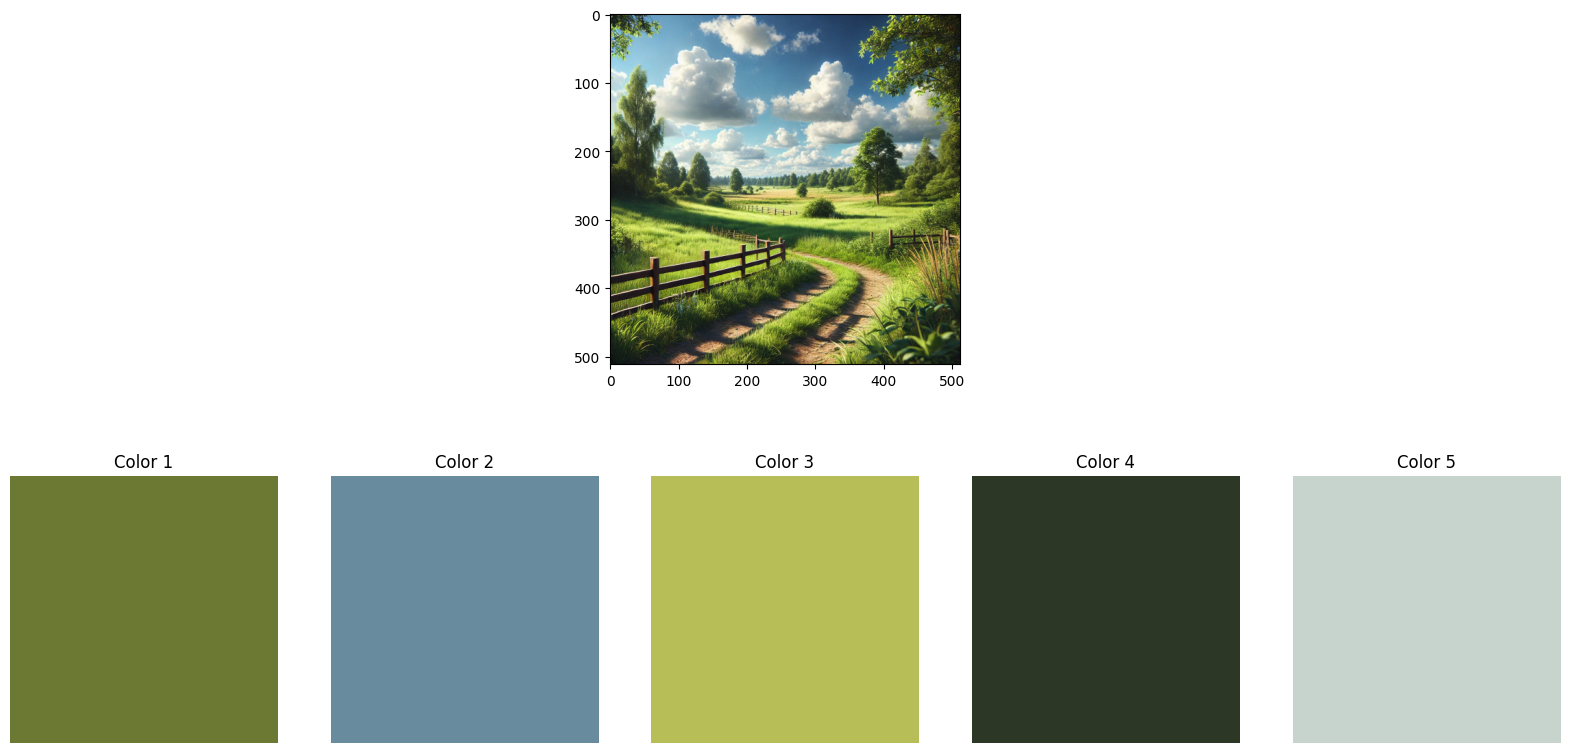

In [11]:
# Load gambar
image = cv2.imread("example_image.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke format RGB
reshaped_image = image.reshape((-1, 3))  # Ubah menjadi array 2D (pixel x warna)

# K-Means Clustering untuk menemukan warna dominan
k = 5  # Jumlah cluster warna
kmeans = KMeans(n_clusters=k)
kmeans.fit(reshaped_image)

# Ekstrak warna dominan
dominant_colors = kmeans.cluster_centers_
dominant_colors = np.uint8(dominant_colors)

# Tampilkan warna dominan
plt.figure(figsize=(20, 10))
plt.subplot(2, k, (1, k))
plt.imshow(image)
for i, color in enumerate(dominant_colors):
    plt.subplot(2, k, k + i + 1)
    plt.imshow([[color / 255]])  # Normalisasi ke rentang 0-1 untuk plt
    plt.axis('off')
    plt.title(f"Color {i+1}")
plt.show()

Hasil Analisis Output:
Hasil output menunjukkan bahwa algoritma K-Means Clustering berhasil mengekstraksi 5 warna dominan dari gambar asli berupa pemandangan alam. Warna dominan yang dihasilkan, seperti hijau kekuningan, hijau gelap, dan biru terang, merepresentasikan elemen utama dalam gambar seperti rerumputan, pohon, dan langit. Warna-warna ini ditampilkan dalam bentuk kotak dengan label "Color 1" hingga "Color 5", memberikan gambaran palet warna utama pada gambar. Analisis ini berguna untuk memahami komposisi warna dalam desain atau citra visual.

# Praktikum 6: Deteksi Kontur pada Gambar

Tujuan: Memahami cara mendeteksi dan menggambar kontur objek pada gambar menggunakan OpenCV.

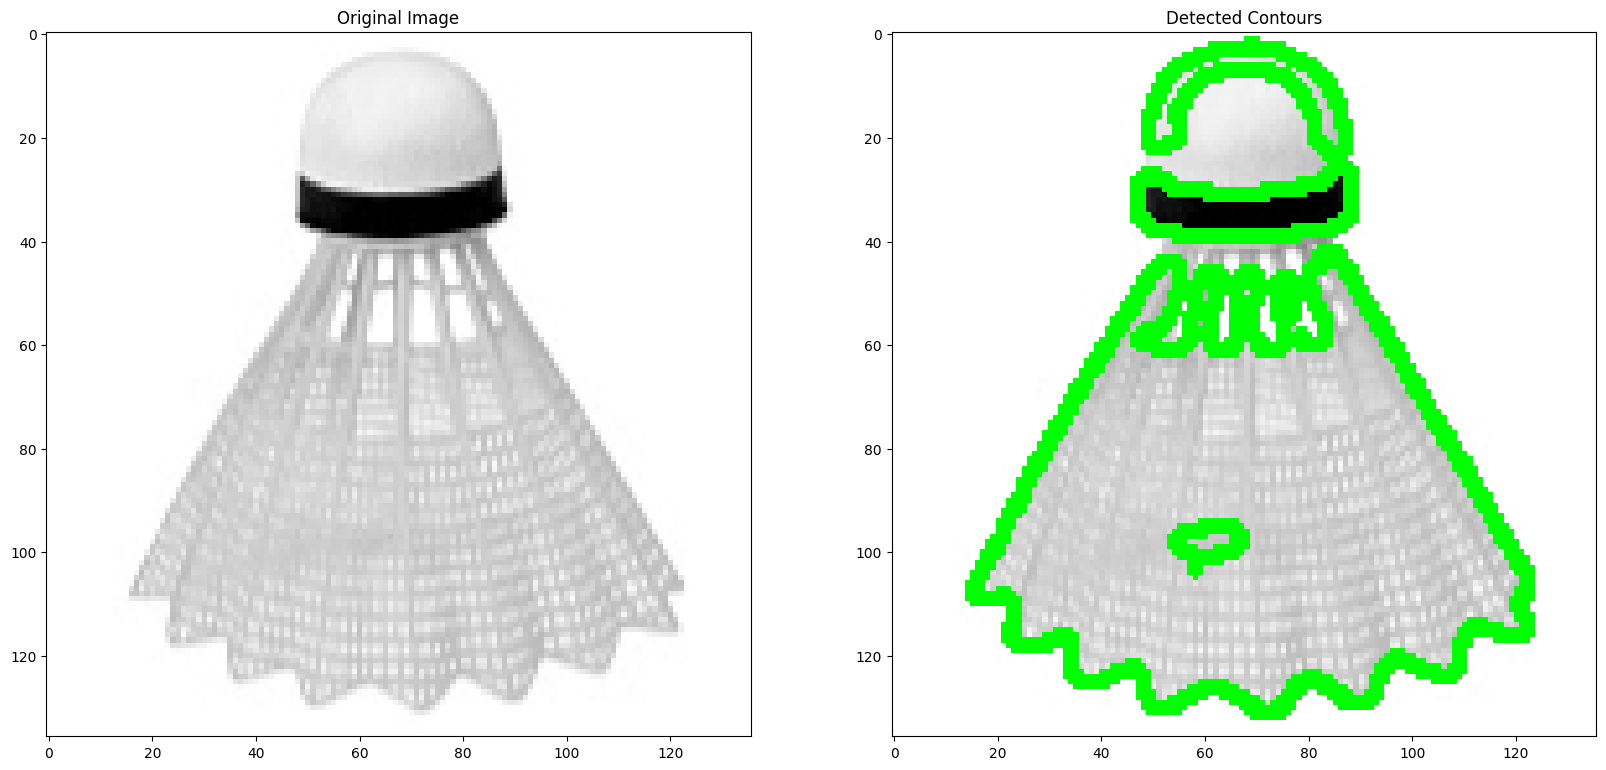

In [8]:
# Load gambar
image = cv2.imread("example_image_object.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Adaptive Threshold untuk pencahayaan tidak merata
threshold = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 2
)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(threshold, 50, 150)

# Temukan kontur
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter kontur besar berdasarkan area
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 50]  # Fokus pada objek besar

# Periksa apakah kontur ditemukan
if len(filtered_contours) > 0:
    # Gambar kontur pada gambar asli
    output = image.copy()
    cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)

    # Tampilkan hasil
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Detected Contours")
    plt.show()
else:
    print("No contours detected. Try adjusting the threshold or area filter parameters.")


Hasil Analisis Output:
Hasil output menunjukkan bahwa algoritma telah berhasil mendeteksi kontur pada gambar shuttlecock (kok). Kontur luar kok ditandai dengan jelas menggunakan garis hijau, sementara beberapa garis dalam, seperti detail jaring, juga terdeteksi. Deteksi ini menunjukkan kemampuan algoritma untuk menangkap elemen-elemen penting dalam gambar. Jika hanya ingin fokus pada kontur luar kok, filter tambahan untuk mengabaikan kontur kecil dapat diterapkan. Secara keseluruhan, hasil ini cukup baik untuk analisis objek utama.